In [1]:
import pandas as pd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
spotify = pd.read_csv('spotify_cleaned.csv')
spotify.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [3]:
spotify_encoded = pd.read_csv('spotify_encoded.csv')
genre_columns = [col for col in spotify_encoded.columns if 'track_genre' in col]
genres = spotify_encoded[genre_columns]
genres['popularity'] = spotify_encoded['popularity']

spotify = spotify.drop('track_genre', axis=1)

/var/folders/37/6l880pbs70bgr73m4qbsq0080000gn/T/ipykernel_38507/1734544241.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genres['popularity'] = spotify_encoded['popularity']


In [4]:
spotify.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,79022.000000,7.902200e+04,79022.000000,79022.000000,79022.000000,79022.000000,79022.000000,79022.000000,79022.000000,79022.000000,79022.000000,79022.000000,79022.000000,79022.000000
mean,34.720053,2.312266e+05,0.559957,0.636516,5.291843,-8.613487,0.630609,0.090144,0.327226,0.189277,0.220469,0.463251,122.076165,3.896573
std,19.484832,1.178002e+05,0.179001,0.258724,3.559259,5.332311,0.482643,0.117950,0.339772,0.334623,0.199562,0.264454,30.138640,0.458772
min,0.000000,8.586000e+03,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,1.731978e+05,0.446000,0.459000,2.000000,-10.459000,0.000000,0.036300,0.015125,0.000000,0.098400,0.240000,99.271000,4.000000
50%,35.000000,2.143005e+05,0.574000,0.680000,5.000000,-7.260000,1.000000,0.049700,0.185000,0.000105,0.133000,0.449000,122.014500,4.000000
75%,49.000000,2.671192e+05,0.692000,0.857000,8.000000,-5.147000,1.000000,0.088600,0.626000,0.181000,0.284000,0.677000,140.108000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


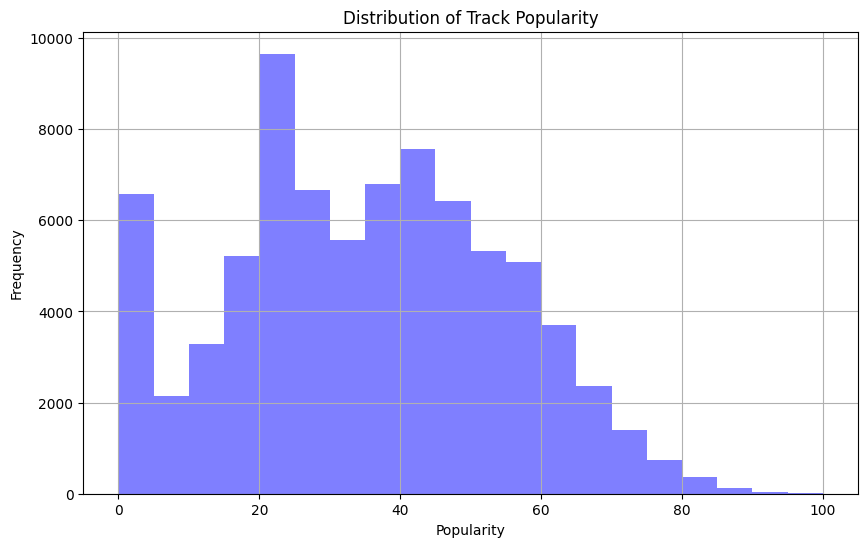

In [5]:
plt.figure(figsize=(10, 6))
plt.hist(spotify['popularity'], bins=20, facecolor='blue', alpha=0.5)
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [6]:
numeric_spotify = spotify.select_dtypes(include=['int64', 'float64'])

In [7]:
correlation_matrix = numeric_spotify.corr()

popularity_correlations = correlation_matrix['popularity'].sort_values()

print("Correlation of Popularity with Features:")
print(popularity_correlations.drop('popularity'))

Correlation of Popularity with Features:
instrumentalness   -0.178868
speechiness        -0.066147
duration_ms        -0.056037
liveness           -0.028150
acousticness       -0.025881
mode               -0.010266
energy             -0.005719
tempo              -0.001363
key                 0.004471
valence             0.012660
time_signature      0.035238
danceability        0.084627
loudness            0.086941
Name: popularity, dtype: float64


<Axes: xlabel='instrumentalness', ylabel='popularity'>

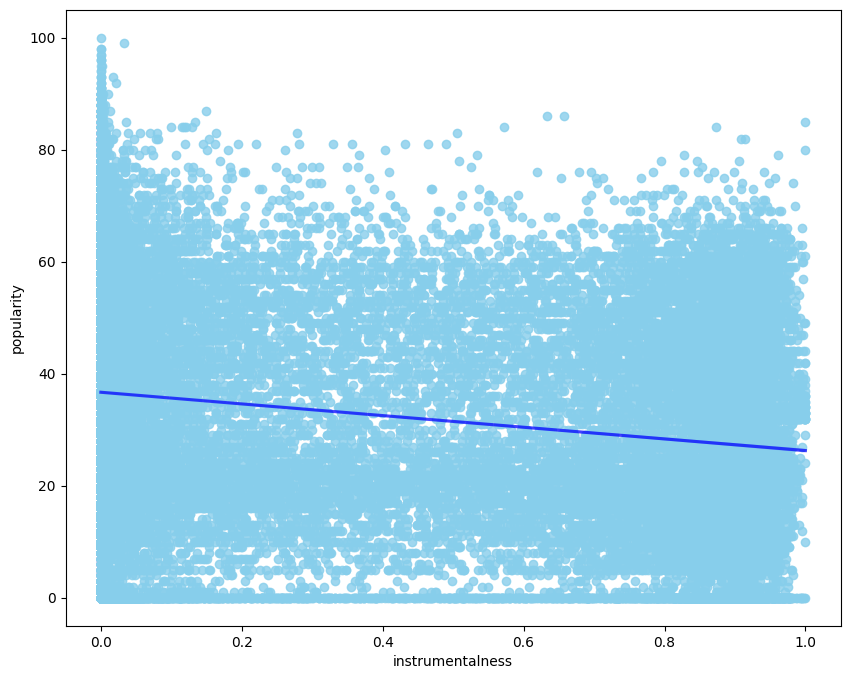

In [31]:
x = spotify['instrumentalness']
y = spotify['popularity']

plt.figure(figsize=(10,8))
sns.regplot(x=x, y=y, color='skyblue', truncate=True, line_kws={"color": "blue", "alpha":0.7})

<Axes: xlabel='speechiness', ylabel='popularity'>

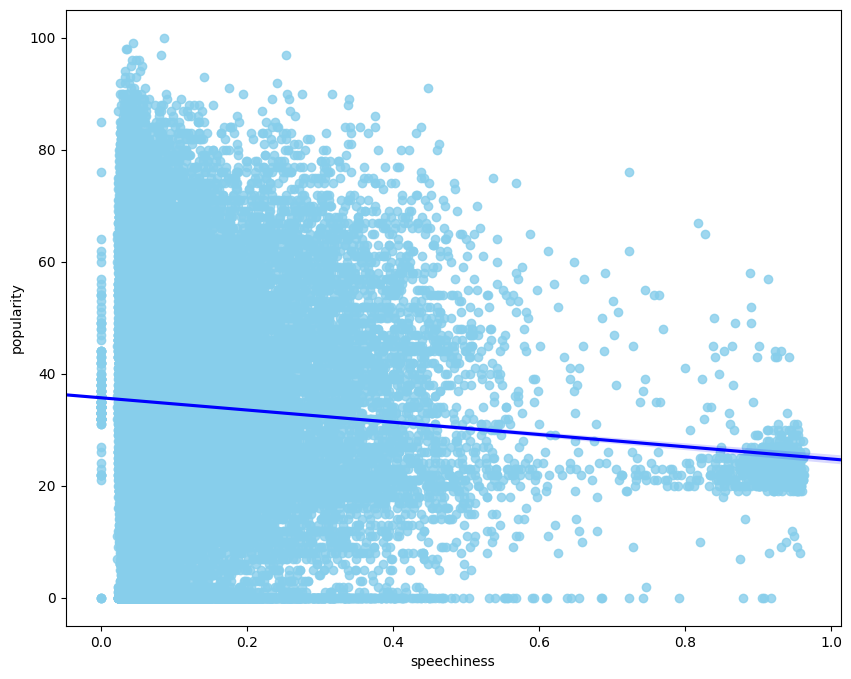

In [28]:
x = spotify['speechiness']
y = spotify['popularity']

plt.figure(figsize=(10,8))
sns.regplot(x=x, y=y, color='skyblue', truncate=True, line_kws={"color": "blue", "alpha":0.7})

<Axes: xlabel='danceability', ylabel='popularity'>

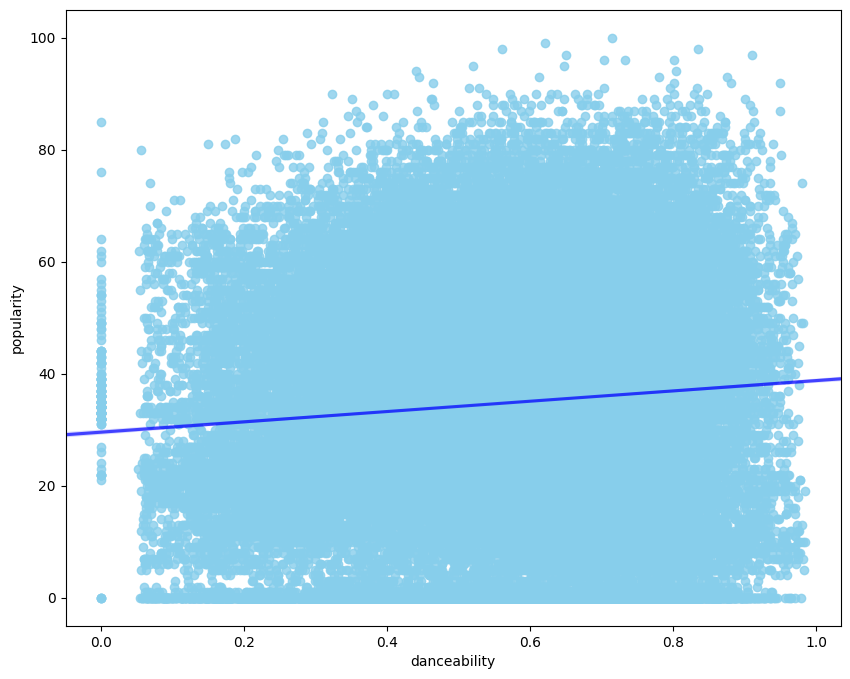

In [33]:
x = spotify['danceability']
y = spotify['popularity']

plt.figure(figsize=(10,8))
sns.regplot(x=x, y=y, color='skyblue', truncate=False, line_kws={"color": "blue", "alpha":0.7})

<Axes: xlabel='loudness', ylabel='popularity'>

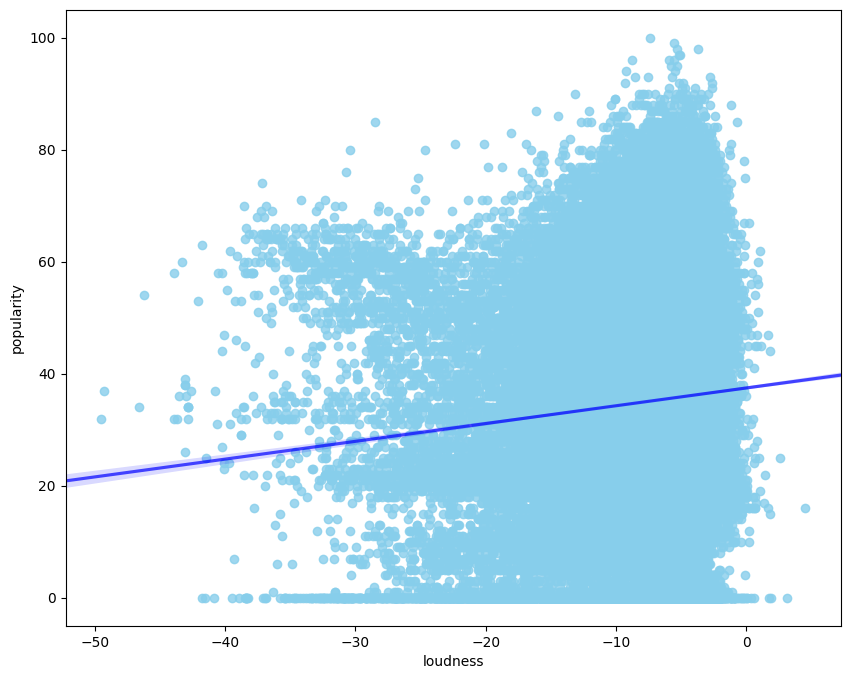

In [34]:
x = spotify['loudness']
y = spotify['popularity']

plt.figure(figsize=(10,8))
sns.regplot(x=x, y=y, color='skyblue', truncate=False, line_kws={"color": "blue", "alpha":0.7})

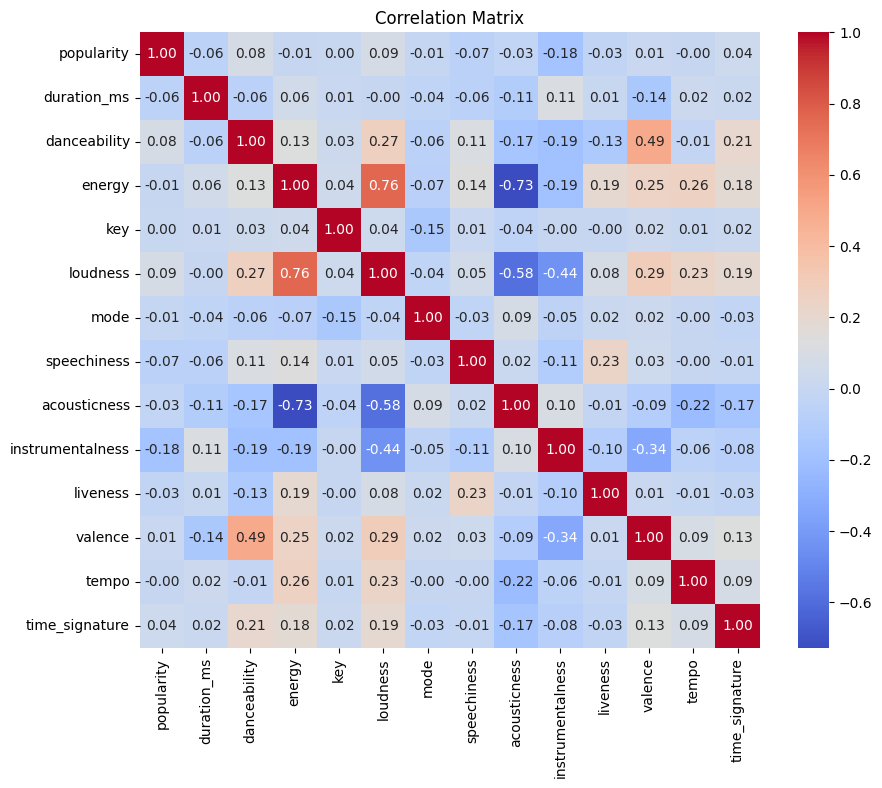

In [8]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.show()

In [9]:
genre_correlations = genres.corr()

print("Correlation of Popularity with Genres:")
print(genre_correlations['popularity'].sort_values().drop('popularity'))

Correlation of Popularity with Genres:
track_genre_iranian          -0.184544
track_genre_romance          -0.132038
track_genre_detroit-techno   -0.131283
track_genre_chicago-house    -0.127653
track_genre_grindcore        -0.115056
                                ...   
track_genre_grunge            0.079271
track_genre_hip-hop           0.083798
track_genre_chill             0.113144
track_genre_pop-film          0.127293
track_genre_k-pop             0.132068
Name: popularity, Length: 113, dtype: float64
